## ASSIGNMENT -COMPETISHUN 

#### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Importing Datasets

In [2]:
l_basic=pd.read_csv(r"D:\Data Analysis-competishun\leads_basic_details.csv")
l_demo=pd.read_csv(r"D:\Data Analysis-competishun\leads_demo_watched_details.csv")
l_inter=pd.read_csv(r"D:\Data Analysis-competishun\leads_interaction_details.csv")
l_reasons=pd.read_csv(r"D:\Data Analysis-competishun\leads_reasons_for_no_interest.csv")
l_sales=pd.read_csv(r"D:\Data Analysis-competishun\sales_managers_assigned_leads_details.csv")

### leads_basic_details

In [3]:
l_basic

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [4]:
#info

l_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [5]:
#Identifying duplicates
l_basic.duplicated().sum()

0

In [6]:
#five point summary

l_basic.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


In [7]:
#by summary we can infer that age has maximum value 211 which is unrealistic and considered as outlier.

<AxesSubplot:xlabel='age'>

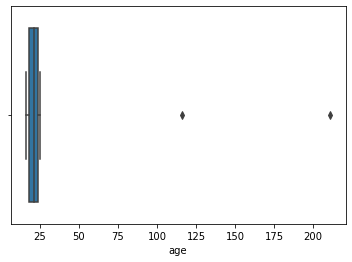

In [8]:
sns.boxplot(l_basic.age)
#we can observe that we have two outliers in age column

In [9]:
#Removing outliers using iqr method

In [10]:
q3=np.quantile(l_basic.age,0.75)
q1=np.quantile(l_basic.age,0.25)
IQR = q3-q1
l_basic= l_basic[~((l_basic.age<(q1-1.5*IQR)) | (l_basic.age>(q3+1.5*IQR)))]

In [11]:
l_basic.describe()

,age
count,358.000000
mean,20.768156
std,2.852959
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,25.000000


In [12]:
l_basic.shape
#we had two outliers in the age column

(358, 7)

In [13]:
l_basic.columns

Index(['lead_id', 'age', 'gender', 'current_city', 'current_education',
       'parent_occupation', 'lead_gen_source'],
      dtype='object')

In [14]:
#showing frequency of values in the different columns

col=['age', 'gender', 'current_city', 'current_education',
       'parent_occupation', 'lead_gen_source']
for i in col:
    print('\n',i,'\n')
    print(l_basic[i].value_counts())


 age 

18    68
20    64
24    50
22    47
25    47
21    42
16    40
Name: age, dtype: int64

 gender 

FEMALE    198
MALE      160
Name: gender, dtype: int64

 current_city 

Visakhapatnam    76
Hyderabad        75
Kochi            67
Bengaluru        51
Mumbai           48
Chennai          41
Name: current_city, dtype: int64

 current_education 

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

 parent_occupation 

Government Employee    128
Business                80
IT Employee             70
Lawyer                  44
Private Employee        14
Doctor                  11
Professor/Faculty       11
Name: parent_occupation, dtype: int64

 lead_gen_source 

social_media       85
SEO                75
email_marketing    73
user_referrals     66
website            59
Name: lead_gen_source, dtype: int64


In [15]:
#in the current_education we have intermediate and intermediate completed 
#therefore, we have to rename one of these values to do more accurate analysis.

l_basic['current_education'].replace({'Intermediate Completed':'Intermediate'}, inplace=True)

In [16]:
#frequency of values in current education column

l_basic['current_education'].value_counts()

B.Tech             139
Looking for Job    117
Intermediate        52
Degree              42
10th Completed       8
Name: current_education, dtype: int64

####  VISUALIZATION

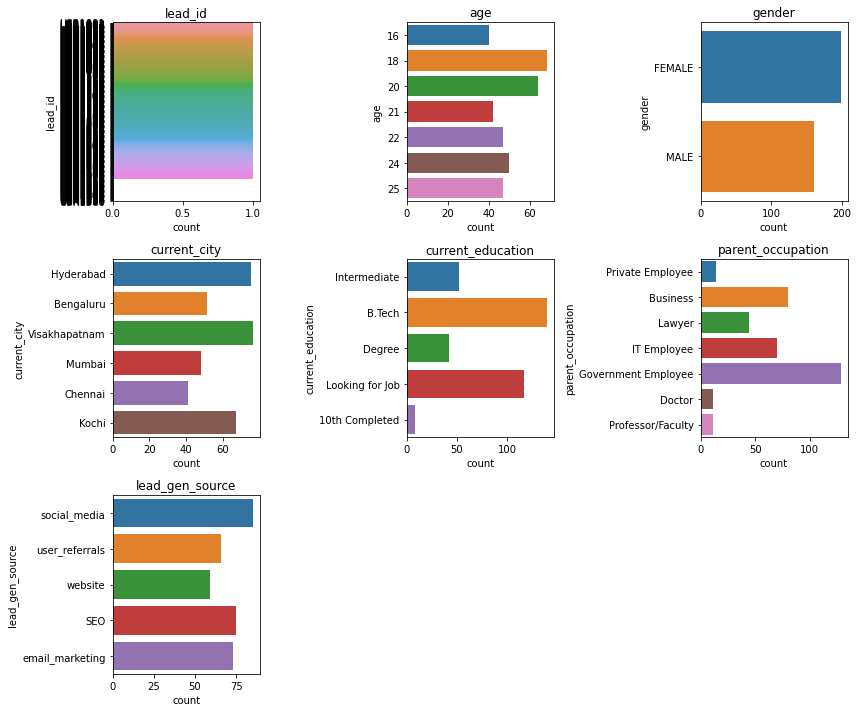

In [17]:
cols=l_basic.columns
plt.figure(figsize=(12,10))
repeator=1

for i in cols:
    plt.subplot(3,3,repeator)
    sns.countplot(y=l_basic[i])
    plt.title(i)
    repeator=repeator+1

plt.tight_layout()
plt.show()

###### INFERENCES:

* the maximum number of leads are between 18 to 24 years old.

* there are more number of female leads than male leads.

* Maximum leads are from Hyderabad and Visakhapatnam, least from Mumbai and Chennai.

* Majority Leads are from B.Tech background and also the leads looking for job.

* Majority of the leads parent occupation is government employee.

* majority of leads came to know about the firm through social media,SEO and email marketing.


### leads_demo_watched_details

In [18]:
l_demo

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54
...,...,...,...,...
189,USR1317,2/25/2022,English,48
190,USR1318,2/25/2022,English,83
191,USR1319,2/28/2022,English,84
192,USR1343,1/25/2022,English,68


In [19]:
l_demo.info()

#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [20]:
l_demo.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


In [21]:
#we can observe that watched_percentage is beyond 100 also which is inaccurate.so we will drop the outlier data
l_demo=l_demo[l_demo.watched_percentage<=100]

In [22]:
l_demo.shape
#we had two outliers in the watched_percentage column

(192, 4)

In [23]:
#we can drop demo_watch_date which has more unique and irrelevent records
l_demo= l_demo.drop(['demo_watched_date'], axis=1)

In [24]:
#Identifying duplicates

l_demo.duplicated().sum()

0

In [25]:
l_demo.columns

Index(['lead_id', 'language', 'watched_percentage'], dtype='object')

In [26]:
#displaying frequency of values in the columns

cols1=['language', 'watched_percentage']
for i in cols1:
    print('\n',i,'\n')
    print(l_demo[i].value_counts())


 language 

English    111
Telugu      61
Hindi       20
Name: language, dtype: int64

 watched_percentage 

80    12
44     6
70     6
65     5
75     5
      ..
30     1
64     1
37     1
66     1
84     1
Name: watched_percentage, Length: 84, dtype: int64


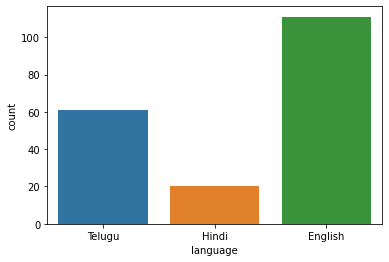

In [27]:
#visuazation of language column
sns.countplot(l_demo['language'])
plt.show()

* Majority of the leads watched in English language
  
  least watched in Hindi language

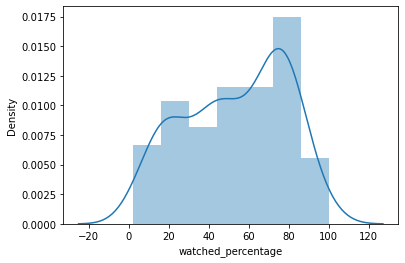

In [28]:
#DIstribution of Watched_percentage through visulaization
plt.figure(figsize=(6,4))
sns.distplot(l_demo['watched_percentage'])
plt.show()

* Almost 10 leads watched full demo video.

  More than 60% of video was covered by majority of the leads.

### leads_interaction_details

In [29]:
l_inter

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


In [30]:
l_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [31]:
l_inter.describe()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
count,2192,2192,2192,2192,2192,2192
unique,16,358,4,40,2,8
top,JNR1012MG,USR1193,lead,1/8/2022,successful,demo_not_attended
freq,164,11,1547,156,1866,701


In [32]:
l_inter

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


####  VISUALIZATION

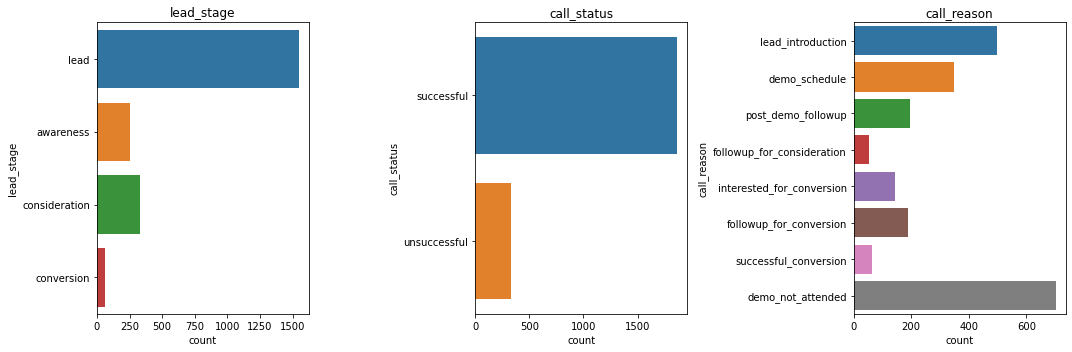

In [33]:
cols2=['lead_stage','call_status','call_reason']
plt.figure(figsize=(15,5))
repeator=1

for i in cols2:
    plt.subplot(1,3,repeator)
    sns.countplot(y=l_inter[i])
    plt.title(i)
    repeator=repeator+1
    

plt.tight_layout()
plt.show()

##### INFERENCES :

* number of leads are high when comparing to the other
* most of the leads are available for conversation on Calls
* the major reason for the calls is about the leads not attending the demo

In [34]:
l_inter.drop(columns=['call_done_date','call_status','call_reason'],inplace=True)

In [35]:
#Identify and drop duplicates
l_inter.duplicated().sum()

1461

In [36]:
l_inter.drop_duplicates(inplace=True)

In [37]:
# Group and display stages for each lead_id in one record
l_inter = l_inter.groupby(['lead_id'], as_index=False).agg({'lead_stage': '-'.join})

In [38]:
# Renaming the stages according the the last stage for better understanding

l_inter['lead_stage'].replace({'lead':'Lead Stage','lead-awareness': 'Awareness Stage', 'lead-awareness-consideration':'Consideration Stage', 'lead-awareness-consideration-conversion':'Conversion Stage'}, inplace=True)

In [39]:
l_inter

,lead_id,lead_stage
0,USR1001,Lead Stage
1,USR1002,Conversion Stage
2,USR1003,Awareness Stage
3,USR1004,Awareness Stage
4,USR1005,Awareness Stage
...,...,...
353,USR1356,Lead Stage
354,USR1357,Lead Stage
355,USR1358,Lead Stage
356,USR1359,Lead Stage


In [40]:
l_inter['lead_stage'].value_counts()

Lead Stage             164
Awareness Stage         79
Conversion Stage        64
Consideration Stage     51
Name: lead_stage, dtype: int64

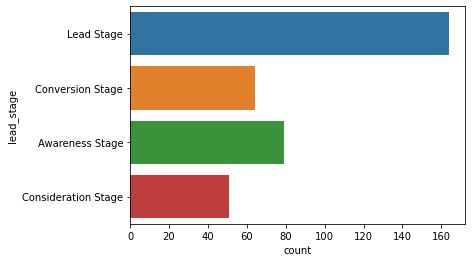

In [41]:

sns.countplot(y=l_inter['lead_stage'])
plt.show()

### leads_reasons_for_no_interest

In [42]:
l_reasons

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN
...,...,...,...,...
289,USR1356,Cannot afford,NaN,NaN
290,USR1357,Cannot afford,NaN,NaN
291,USR1358,Wants offline classes,NaN,NaN
292,USR1359,Will join in final year,NaN,NaN


In [43]:
l_reasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [44]:
#we have null values in the data
#In this scenario, we can combine the values of these three columns
#into a single column named 'reason_for_not_interested'.

In [45]:
# Replacing Null values with an empty string
li=['reasons_for_not_interested_in_demo','reasons_for_not_interested_to_consider','reasons_for_not_interested_to_convert']

for i in li:
    l_reasons[i] = l_reasons[i].fillna('')

In [46]:
# Combine all the values in the existing columns and store them in the new column.
l_reasons['Reason_for_not_interested'] = l_reasons['reasons_for_not_interested_in_demo']+l_reasons['reasons_for_not_interested_to_consider']+ l_reasons['reasons_for_not_interested_to_convert']

In [47]:
# Dropping the columns that are no longer required for analysis.
l_reasons= l_reasons.drop(['reasons_for_not_interested_in_demo','reasons_for_not_interested_to_consider', 'reasons_for_not_interested_to_convert'], axis=1)

In [48]:
l_reasons.describe()

,lead_id,Reason_for_not_interested
count,294,294
unique,294,6
top,USR1001,Can't afford
freq,1,95


In [49]:
#Identify and drop duplicates
l_reasons.duplicated().sum()

0

In [50]:
l_reasons['Reason_for_not_interested'].value_counts()

#We notice that there are two values 'Can't afford' and 'Cannot afford' in 'Reason_for_not_interested' column that 
# mean the same We shall rename one of these values for more accurate analysis.

Can't afford                        95
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Cannot afford                        4
Name: Reason_for_not_interested, dtype: int64

In [51]:
#replacing can't afford with cannot afford

l_reasons['Reason_for_not_interested'].replace({"Can't afford":'Cannot afford'}, inplace=True)

In [52]:
l_reasons['Reason_for_not_interested'].value_counts()

Cannot afford                       99
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Name: Reason_for_not_interested, dtype: int64

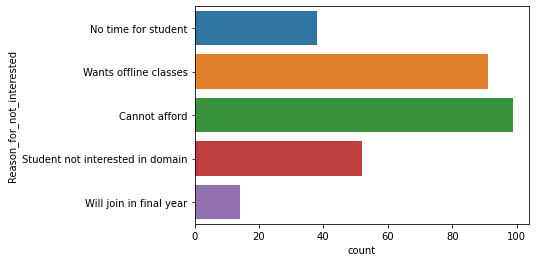

In [54]:
#VISUALIZATION

sns.countplot(y=l_reasons['Reason_for_not_interested'])
plt.show()

##### INFERENCES
* The top reasons for the leads to drop:

  Affordability of the course and preferring offline classes

### sales_managers_assigned_leads_details

In [55]:
l_sales

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
...,...,...,...,...,...
355,SNR501MG,JNR1001MG,2/19/2022,4,USR1356
356,SNR501MG,JNR1001MG,1/1/2022,1,USR1357
357,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
358,SNR501MG,JNR1001MG,1/15/2022,3,USR1359


In [56]:
l_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [57]:
l_sales.describe(include='all')

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
count,360,360,360,360.000000,360
unique,4,16,4,NaN,360
top,SNR503MG,JNR1001MG,1/1/2022,NaN,USR1001
freq,98,34,94,NaN,1
mean,NaN,NaN,NaN,2.469444,NaN
std,NaN,NaN,NaN,1.124139,NaN
min,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,2.000000,NaN
75%,NaN,NaN,NaN,3.000000,NaN


In [58]:
#Identify and drop duplicates
l_sales.duplicated().sum()

0

In [59]:
l_sales['cycle'].value_counts()

1    94
2    91
4    88
3    87
Name: cycle, dtype: int64

#### VISUALIZATION

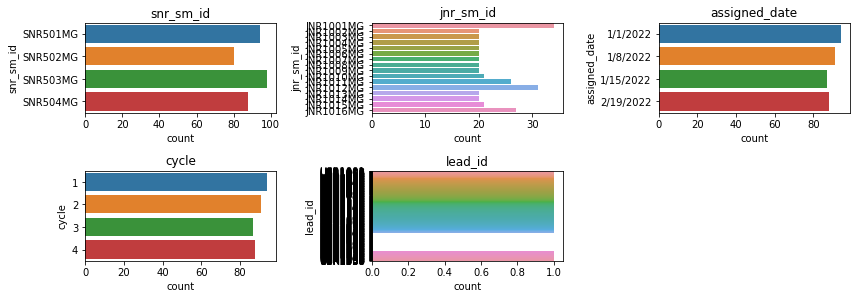

In [60]:

cols4=l_sales.columns
plt.figure(figsize=(12,10))
repeator=1

for i in cols4:
    plt.subplot(5,3,repeator)
    sns.countplot(y=l_sales[i])
    plt.title(i)
    repeator=repeator+1

plt.tight_layout()
plt.show()

##### INFERENCES
* there are four Senior Sales Managers
* there are 16 junior sales managers

* It may be number of Junior Sales Managers are evenly assigned among Senior Sales Managers

### COMBINING DATAFRAMES

In [61]:
df1 = pd.merge(l_basic,l_inter)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 355
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            356 non-null    object
 1   age                356 non-null    int64 
 2   gender             356 non-null    object
 3   current_city       356 non-null    object
 4   current_education  356 non-null    object
 5   parent_occupation  356 non-null    object
 6   lead_gen_source    356 non-null    object
 7   lead_stage         356 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.0+ KB


In [62]:
df2 = pd.merge(df1,l_sales)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            356 non-null    object
 1   age                356 non-null    int64 
 2   gender             356 non-null    object
 3   current_city       356 non-null    object
 4   current_education  356 non-null    object
 5   parent_occupation  356 non-null    object
 6   lead_gen_source    356 non-null    object
 7   lead_stage         356 non-null    object
 8   snr_sm_id          356 non-null    object
 9   jnr_sm_id          356 non-null    object
 10  assigned_date      356 non-null    object
 11  cycle              356 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 36.2+ KB


In [63]:
df3 = pd.merge(df2,l_reasons, how = 'left', on='lead_id')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 355
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    356 non-null    object
 1   age                        356 non-null    int64 
 2   gender                     356 non-null    object
 3   current_city               356 non-null    object
 4   current_education          356 non-null    object
 5   parent_occupation          356 non-null    object
 6   lead_gen_source            356 non-null    object
 7   lead_stage                 356 non-null    object
 8   snr_sm_id                  356 non-null    object
 9   jnr_sm_id                  356 non-null    object
 10  assigned_date              356 non-null    object
 11  cycle                      356 non-null    int64 
 12  Reason_for_not_interested  292 non-null    object
dtypes: int64(2), object(11)
memory usage: 38.9+ KB


In [64]:
df3['Reason_for_not_interested'] = df3['Reason_for_not_interested'].fillna('Interested')

In [65]:
df= pd.merge(df3,l_demo,how='left',on='lead_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 355
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lead_id                    356 non-null    object 
 1   age                        356 non-null    int64  
 2   gender                     356 non-null    object 
 3   current_city               356 non-null    object 
 4   current_education          356 non-null    object 
 5   parent_occupation          356 non-null    object 
 6   lead_gen_source            356 non-null    object 
 7   lead_stage                 356 non-null    object 
 8   snr_sm_id                  356 non-null    object 
 9   jnr_sm_id                  356 non-null    object 
 10  assigned_date              356 non-null    object 
 11  cycle                      356 non-null    int64  
 12  Reason_for_not_interested  356 non-null    object 
 13  language                   191 non-null    object 

In [66]:
df['language'].value_counts()

English    111
Telugu      61
Hindi       19
Name: language, dtype: int64

In [67]:
df['language'] = df['language'].fillna('Info Unavailable')

In [68]:
df['watched_percentage'] = df['watched_percentage'].fillna('0')

In [69]:
df.isnull().sum()

lead_id                      0
age                          0
gender                       0
current_city                 0
current_education            0
parent_occupation            0
lead_gen_source              0
lead_stage                   0
snr_sm_id                    0
jnr_sm_id                    0
assigned_date                0
cycle                        0
Reason_for_not_interested    0
language                     0
watched_percentage           0
dtype: int64

In [70]:
df.duplicated().sum()

0

In [71]:
df.to_csv('Data_Analysis_Competishun.csv')